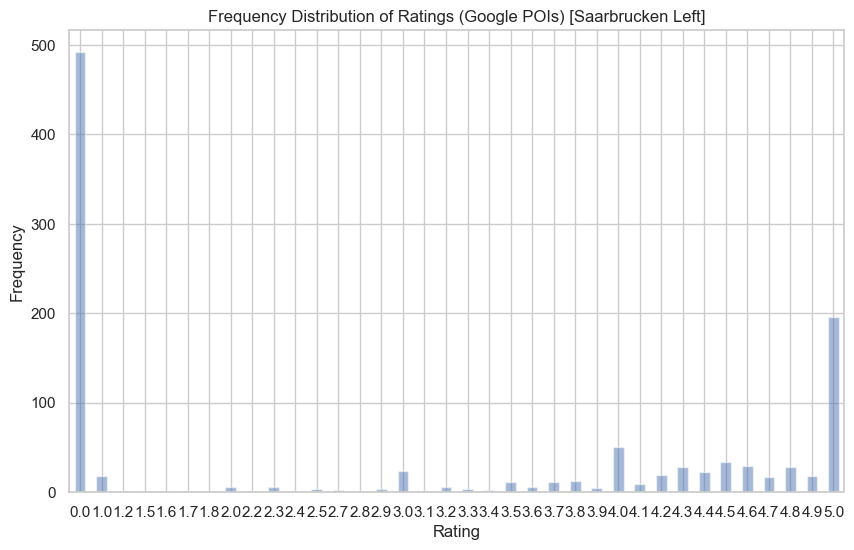

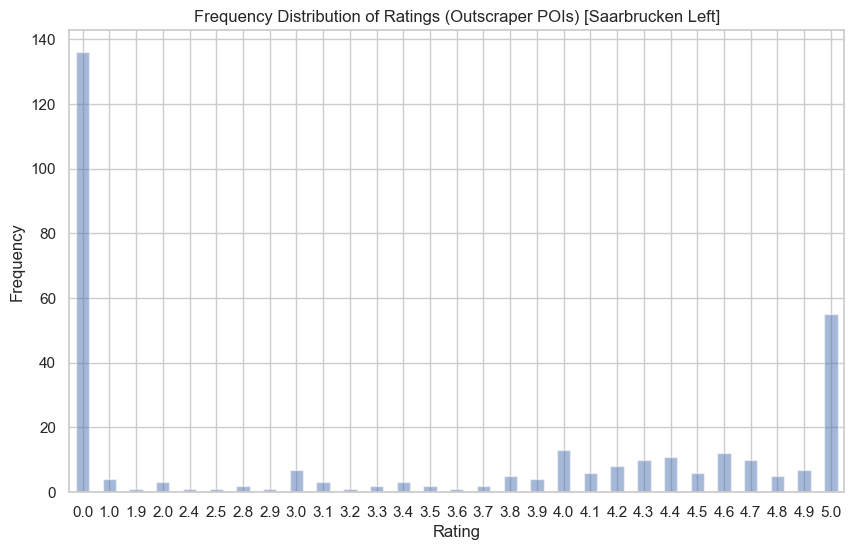

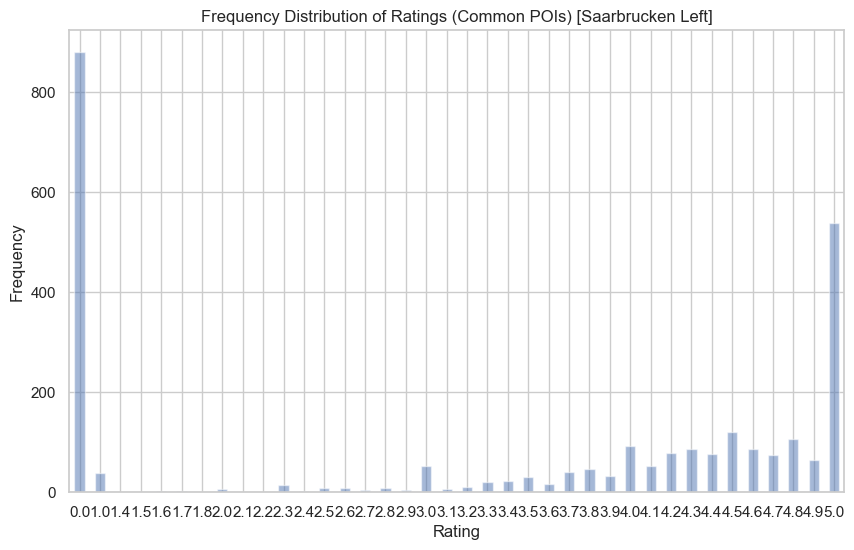

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Frequency Distribution of Ratings (Google POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Outscraper POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Common POIs) [Saarbrucken Left]'
]

# Read each CSV file and calculate the frequency distribution of the 'rating' column
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    rating_distribution = df['rating'].value_counts().sort_index()
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    rating_distribution.plot(kind='bar', alpha=0.5)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

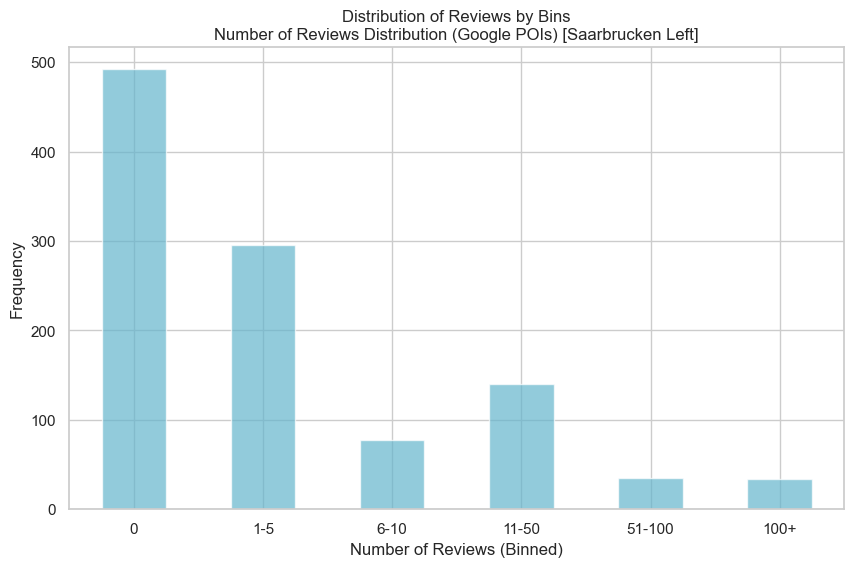

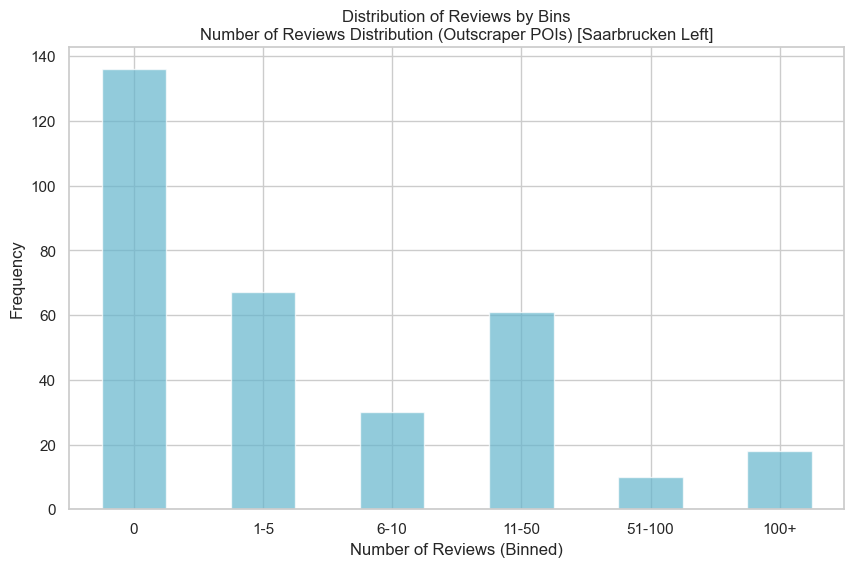

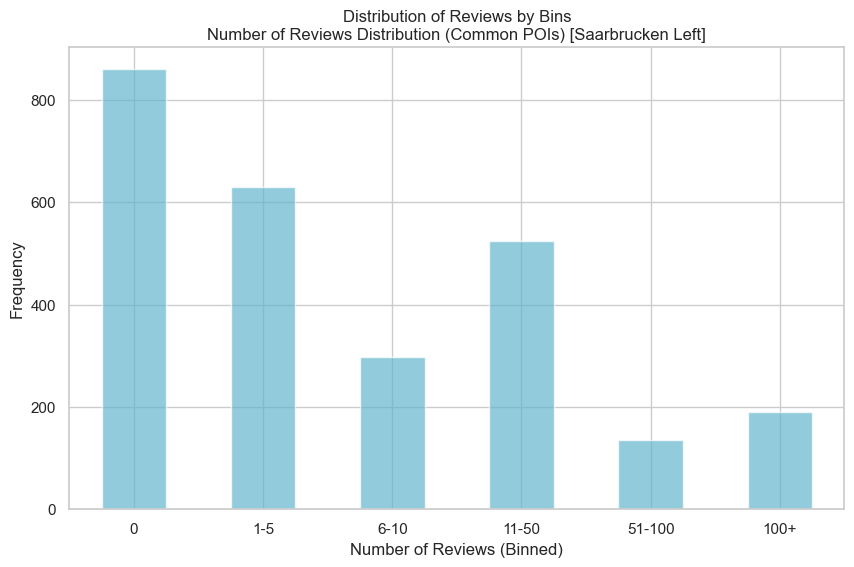

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Number of Reviews Distribution (Google POIs) [Saarbrucken Left]',
    'Number of Reviews Distribution (Outscraper POIs) [Saarbrucken Left]',
    'Number of Reviews Distribution (Common POIs) [Saarbrucken Left]'
]

# Define bins for the number of reviews
bins = [0, 1, 5, 10, 50, 100, float('inf')]
labels = ['0', '1-5', '6-10', '11-50', '51-100', '100+']

# Read each CSV file and plot the data
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    
    # Ensure 'reviews' column is numeric, fill NaN with 0
    df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').fillna(0)
    
    # Create bins and categorize the data
    df['review_bins'] = pd.cut(df['reviews'], bins=bins, labels=labels, right=False)
    
    # Plot the histogram for review bins
    plt.figure(figsize=(10, 6))
    df['review_bins'].value_counts(sort=False).plot(kind='bar', alpha=0.7, color='c')
    plt.title(f'Distribution of Reviews by Bins\n{title}')
    plt.xlabel('Number of Reviews (Binned)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()

    # # Plot a density plot for number of reviews
    # plt.figure(figsize=(10, 6))
    # df['reviews'].plot(kind='density', alpha=0.75, color='b')
    # plt.title(f'Density Plot of Reviews\n{title}')
    # plt.xlabel('Number of Reviews')
    
    # # Show the plot
    # plt.show()


Google vs Outscraper KS Test: Statistic=0.04518590125786528, p-value=0.6719275497190216
Google vs Common KS Test: Statistic=0.13334289196358162, p-value=2.7512871725526917e-12
Outscraper vs Common KS Test: Statistic=0.09856335568479496, p-value=0.007003056714335046


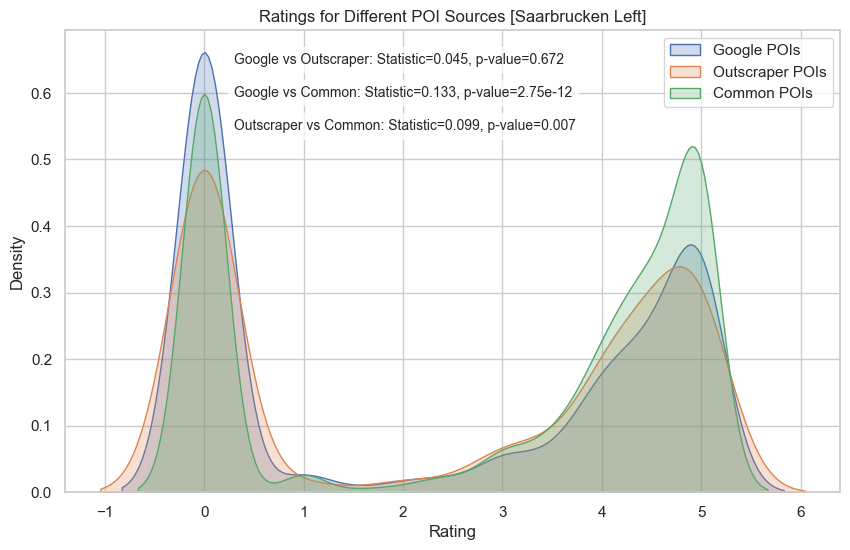

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is great for KDE plots
from scipy.stats import ks_2samp  # KS test function

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Google POIs',
    'Outscraper POIs',
    'Common POIs'
]

# Load the CSV files into dataframes (without replacing NaN values)
dfs = [pd.read_csv(csv_file) for csv_file in csv_files]

# Perform the KS test between the pairs of data
ks_tests = {
    'Google vs Outscraper': ks_2samp(dfs[0]['rating'], dfs[1]['rating']),
    'Google vs Common': ks_2samp(dfs[0]['rating'], dfs[2]['rating']),
    'Outscraper vs Common': ks_2samp(dfs[1]['rating'], dfs[2]['rating'])
}

# Print KS test results
for comparison, result in ks_tests.items():
    print(f'{comparison} KS Test: Statistic={result.statistic}, p-value={result.pvalue}')

# Set up the plot style
sns.set(style='whitegrid')

# Create a new figure for the combined plot
plt.figure(figsize=(10, 6))

# Read each CSV file and create KDE plot for the 'rating' column
for df, title in zip(dfs, titles):
    # KDE plot using Seaborn
    sns.kdeplot(df['rating'], fill=True, bw_adjust=0.5, label=title)  # You can adjust bw_adjust for smoother or rougher curve

# Customize the plot
plt.title('Ratings for Different POI Sources [Saarbrucken Left]')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()

# Annotate KS test results on the plot
y_max = plt.ylim()[1]  # Get the maximum y limit for positioning the text
spacing = 0.05  # Space between the annotations

# Positioning the annotations
for i, (comparison, result) in enumerate(ks_tests.items()):
    plt.text(0.3, y_max - (i + 1) * spacing, f'{comparison}: Statistic={result.statistic:.3f}, p-value={result.pvalue:.3g}',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Display the plot
plt.show()



Chi-Squared Test Results for Reviews:


<Figure size 1000x600 with 0 Axes>

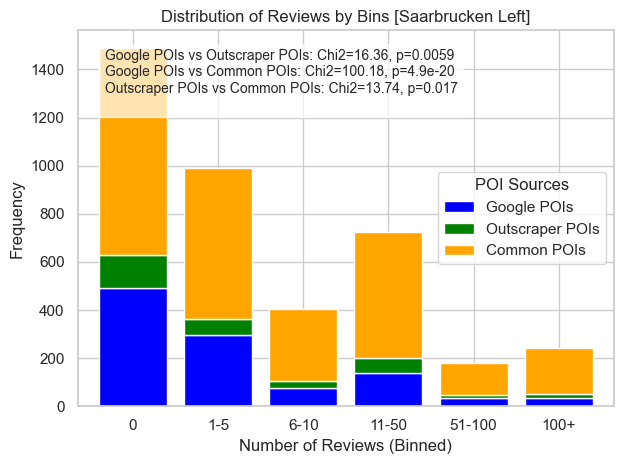

Google POIs vs Outscraper POIs: Chi2 Statistic=16.356, p-value=0.0059
Google POIs vs Common POIs: Chi2 Statistic=100.175, p-value=4.85e-20
Outscraper POIs vs Common POIs: Chi2 Statistic=13.738, p-value=0.0174


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency  # Chi-Squared test

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each dataset
titles = [
    'Google POIs',
    'Outscraper POIs',
    'Common POIs'
]

# Load the CSV files into dataframes (without replacing NaN values)
dfs = [pd.read_csv(csv_file) for csv_file in csv_files]

# Prepare data for the bar plot with review bins
review_bins = [0, 1, 5, 10, 50, 100, float('inf')]
labels = ['0', '1-5', '6-10', '11-50', '51-100', '100+']

# Create a new DataFrame for review counts in bins
review_data = []
for df in dfs:
    # Categorize the reviews into bins
    df['review_bins'] = pd.cut(df['reviews'], bins=review_bins, labels=labels, right=False)
    review_counts = df['review_bins'].value_counts(sort=False).reindex(labels, fill_value=0)
    review_data.append(review_counts)

# Convert review data to a DataFrame for easier plotting
review_df = pd.DataFrame(review_data, index=titles).T

# Colors to be used for different datasets
colors = ['Blue', 'Green', 'Orange']  # Google, Outscraper, and Common POIs colors

# Create a new figure for the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot stacked bar charts for reviews in bins
review_df.plot(kind='bar', stacked=True, color=colors, width=0.8)

# Customize the plot for reviews
plt.title('Distribution of Reviews by Bins [Saarbrucken Left]')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Ensure the legend matches the colors
plt.legend(title='POI Sources', labels=titles, facecolor='white')

# -------- Perform Chi-Squared Test ---------
print("\nChi-Squared Test Results for Reviews:")
chi2_results_text = ""  # To store the results text

# Perform Chi-Squared test between the pairs of data for reviews
chi2_results = {}
for i, counts1 in enumerate(review_data):
    for j, counts2 in enumerate(review_data):
        if i < j:  # To avoid repeating comparisons
            contingency_table = pd.DataFrame({
                titles[i]: counts1,
                titles[j]: counts2
            }).T
            
            # Handle potential missing values (just to be safe)
            contingency_table.fillna(0, inplace=True)
            
            # Perform the Chi-Squared test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # Check if expected counts are too low for valid results
            if (expected < 5).sum() > 0:
                print(f"Warning: Chi-Squared test for {titles[i]} vs {titles[j]} may not be valid due to small expected frequencies.")
            
            # Store the results
            chi2_results[f'{titles[i]} vs {titles[j]}'] = (chi2_stat, p_value)
            
            # Append the results to the text
            chi2_results_text += f'{titles[i]} vs {titles[j]}: Chi2={chi2_stat:.2f}, p={p_value:.2g}\n'

# Add Chi-Squared test results to the plot as a text box
plt.text(0.05, 0.95, chi2_results_text, 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.7))

# Display the plot for reviews
plt.tight_layout()
plt.show()

# Print Chi-Squared test results for reference
for comparison, result in chi2_results.items():
    print(f'{comparison}: Chi2 Statistic={result[0]:.3f}, p-value={result[1]:.3g}')
